In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import t
from scipy.stats import chi2

pd.set_option("display.max_rows", None)
# pd.reset_option("display.max_rows")

# Вводные данные в зависимости от варианта

In [38]:
file_name = 'text_sent_2.txt'

words = [None, 'tree']

# Находим биграммы и сортируем

In [39]:
bigramms = {}
N = 0
with open(file_name, "r") as file:

    text = file.read().split()
    N = len(text)

    for i in range(N):

        if text[i] == words[1] and text[i - 1] != text[i]:

                if text[i - 1] + ' ' + text[i] not in bigramms.keys():
                    bigramms[text[i - 1] + ' ' + text[i]] = 1
                else:
                    bigramms[text[i - 1] + ' ' + text[i]] += 1
                    
bigramms = dict(sorted(bigramms.items(), key=lambda item: item[1], reverse=True))
main_sum = sum(bigramms.values())

print(f'N = {N}')
print(len(bigramms.keys()), 'bigramms')
    
df = pd.DataFrame({'bigramm': bigramms.keys(), 'n': bigramms.values()})
# df.head(10)
df

N = 130366
70 bigramms


,bigramm,n
0,the tree,57
1,regression tree,24
2,classification tree,14
3,decision tree,12
4,pruned tree,8
...,...,...
65,set tree,1
66,attractive tree,1
67,down tree,1
68,natural tree,1


# Формируем таблицу сопряженности для кажой биграммы

In [40]:
O = {}
for i in bigramms.keys():
        
        word_2 = i.split()[0]
        sub_bigramms = {}
    
        with open(file_name, "r") as file:
            
            text = file.read().split()
        
            for j in range(N - 1):

                if text[j] == word_2 and text[j + 1] != i.split()[1]:

                    if text[j] + ' ' + text[j + 1] not in sub_bigramms.keys():
                        sub_bigramms[text[j] + ' ' + text[j + 1]] = 1
                    else:
                        sub_bigramms[text[j] + ' ' + text[j + 1]] += 1
                    
        sub_bigramms = dict(sorted(sub_bigramms.items(), key=lambda item: item[1], reverse=True))
        sub_sum = sum(sub_bigramms.values())
        O[i] = [bigramms[i], main_sum - bigramms[i], sub_sum, N - bigramms[i] - main_sum - bigramms[i] - sub_sum]

df = pd.DataFrame({'bigramm': O.keys(), 'O11, O12, O21, O22': O.values()})
# df.head(10)
df

,bigramm,"O11, O12, O21, O22"
0,the tree,"[57, 186, 10675, 119334]"
1,regression tree,"[24, 219, 1016, 129059]"
2,classification tree,"[14, 229, 157, 129938]"
3,decision tree,"[12, 231, 148, 129951]"
4,pruned tree,"[8, 235, 5, 130102]"
...,...,...
65,set tree,"[1, 242, 818, 129303]"
66,attractive tree,"[1, 242, 8, 130113]"
67,down tree,"[1, 242, 48, 130073]"
68,natural tree,"[1, 242, 51, 130070]"


# Вычисляем значение статистик критериев

In [41]:
ttest, chi2, LHR, MI1, MI2 = [], [], [], [], []
for i in bigramms.keys():
    
    #хи-квадрат
    chi2.append((N*((O[i][0]*O[i][3] - O[i][1]*O[i][2])**2))/((O[i][0]+O[i][1])*(O[i][0]+O[i][2])*(O[i][3]+O[i][1])*(O[i][3]+O[i][2])))
    
    #точечная взаимная информация
    MI1.append(np.log2(N*O[i][0]/((O[i][0]+O[i][1])*(O[i][0]+O[i][2]))))
    
    #средняя взаимная информация
    MI2.append(O[i][0] / N * np.log2(N * O[i][0] / ((O[i][0] + O[i][1])*(O[i][0] + O[i][2])))    +     O[i][1] / N * np.log2(N * O[i][1] / ((O[i][0] + O[i][1])*(O[i][1] + O[i][3])))   +   O[i][2] / N * np.log2(N * O[i][2] / ((O[i][2] + O[i][3])*(O[i][0] + O[i][2])))   +   O[i][3] / N * np.log2(N * O[i][3] / ((O[i][2] + O[i][3])*(O[i][1] + O[i][3]))))
    
df['chi2'] = chi2
df['MI_p'] = MI1
df['MI_mean'] = MI2
# df.head(10)
df

C:\Users\Sp1r14ual\AppData\Local\Temp\ipykernel_11152\1274967420.py:11: RuntimeWarning: divide by zero encountered in log2
  MI2.append(O[i][0] / N * np.log2(N * O[i][0] / ((O[i][0] + O[i][1])*(O[i][0] + O[i][2])))    +     O[i][1] / N * np.log2(N * O[i][1] / ((O[i][0] + O[i][1])*(O[i][1] + O[i][3])))   +   O[i][2] / N * np.log2(N * O[i][2] / ((O[i][2] + O[i][3])*(O[i][0] + O[i][2])))   +   O[i][3] / N * np.log2(N * O[i][3] / ((O[i][2] + O[i][3])*(O[i][1] + O[i][3]))))
C:\Users\Sp1r14ual\AppData\Local\Temp\ipykernel_11152\1274967420.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  MI2.append(O[i][0] / N * np.log2(N * O[i][0] / ((O[i][0] + O[i][1])*(O[i][0] + O[i][2])))    +     O[i][1] / N * np.log2(N * O[i][1] / ((O[i][0] + O[i][1])*(O[i][1] + O[i][3])))   +   O[i][2] / N * np.log2(N * O[i][2] / ((O[i][2] + O[i][3])*(O[i][0] + O[i][2])))   +   O[i][3] / N * np.log2(N * O[i][3] / ((O[i][2] + O[i][3])*(O[i][1] + O[i][3]))))


,bigramm,"O11, O12, O21, O22",chi2,MI_p,MI_mean
0,the tree,"[57, 186, 10675, 119334]",74.631877,1.510654,0.001549
1,regression tree,"[24, 219, 1016, 129059]",253.545192,3.629990,0.000969
2,classification tree,"[14, 229, 157, 129938]",589.101783,5.456898,0.000755
3,decision tree,"[12, 231, 148, 129951]",460.553882,5.330430,0.000635
4,pruned tree,"[8, 235, 5, 130102]",2630.347499,8.366956,0.000639
...,...,...,...,...,...
65,set tree,"[1, 242, 818, 129303]",0.183158,-0.610324,0.000023
66,attractive tree,"[1, 242, 8, 130113]",57.737859,5.897471,0.000057
67,down tree,"[1, 242, 48, 130073]",9.060281,3.452686,0.000039
68,natural tree,"[1, 242, 51, 130070]",8.433007,3.366956,0.000038


# Сортируем по значению статистики хи-квадрат

In [42]:
# df.sort_values(by='chi2', ascending=False).head(10)
df.sort_values(by='chi2', ascending=False)

,bigramm,"O11, O12, O21, O22",chi2,MI_p,MI_mean
4,pruned tree,"[8, 235, 5, 130102]",2630.347499,8.366956,0.000639
11,unpruned tree,"[4, 239, 3, 130112]",1220.606102,8.260041,0.000314
2,classification tree,"[14, 229, 157, 129938]",589.101783,5.456898,0.000755
56,detercv tree,"[1, 242, 0, 130121]",535.489689,9.067396,NaN
55,asterisks tree,"[1, 242, 0, 130121]",535.489689,9.067396,NaN
...,...,...,...,...,...
30,with tree,"[2, 241, 829, 129290]",0.132393,0.368691,0.000045
37,figure tree,"[1, 242, 421, 129700]",0.058184,0.346296,0.000022
48,using tree,"[1, 242, 634, 129487]",0.028687,-0.243217,0.000022
64,which tree,"[1, 242, 559, 129562]",0.001853,-0.061887,0.000022


# Сортируем по значению точечной взаимной информации

In [43]:
# df.sort_values(by='MI_p', ascending=False).head(10)
df.sort_values(by='MI_p', ascending=False)

,bigramm,"O11, O12, O21, O22",chi2,MI_p,MI_mean
56,detercv tree,"[1, 242, 0, 130121]",535.489689,9.067396,NaN
55,asterisks tree,"[1, 242, 0, 130121]",535.489689,9.067396,NaN
4,pruned tree,"[8, 235, 5, 130102]",2630.347499,8.366956,0.000639
11,unpruned tree,"[4, 239, 3, 130112]",1220.606102,8.260041,0.000314
50,interior tree,"[1, 242, 1, 130120]",266.747801,8.067396,0.000076
...,...,...,...,...,...
65,set tree,"[1, 242, 818, 129303]",0.183158,-0.610324,0.000023
33,this tree,"[1, 242, 1245, 128876]",0.761817,-1.215693,0.000027
14,of tree,"[3, 240, 4343, 125774]",3.329325,-1.433114,0.000091
44,for tree,"[1, 242, 1733, 128388]",1.565306,-1.692493,0.000034


# Сортируем по значению точечной взаимной информации

In [44]:
# df.sort_values(by='MI_mean', ascending=False).head(10)
df.sort_values(by='MI_mean', ascending=False)

,bigramm,"O11, O12, O21, O22",chi2,MI_p,MI_mean
0,the tree,"[57, 186, 10675, 119334]",74.631877,1.510654,0.001549
1,regression tree,"[24, 219, 1016, 129059]",253.545192,3.629990,0.000969
2,classification tree,"[14, 229, 157, 129938]",589.101783,5.456898,0.000755
4,pruned tree,"[8, 235, 5, 130102]",2630.347499,8.366956,0.000639
3,decision tree,"[12, 231, 148, 129951]",460.553882,5.330430,0.000635
...,...,...,...,...,...
48,using tree,"[1, 242, 634, 129487]",0.028687,-0.243217,0.000022
64,which tree,"[1, 242, 559, 129562]",0.001853,-0.061887,0.000022
46,error tree,"[1, 242, 533, 129588]",0.000022,0.006700,0.000022
55,asterisks tree,"[1, 242, 0, 130121]",535.489689,9.067396,NaN


# Добавлем столбец с предпологаемым результатом классификации

In [45]:
df = pd.DataFrame({'bigramm': O.keys(), 'O11, O12, O21, O22': O.values(), 'chi2':chi2, 'MI_p':MI1, 'MI_mean':MI2,})
df = df.dropna()

y = [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
df['test_y'] = y
# df[['bigramm', 'test_y']].head(10)
df[['bigramm', 'test_y']]


,bigramm,test_y
0,the tree,0
1,regression tree,1
2,classification tree,1
3,decision tree,1
4,pruned tree,1
...,...,...
65,set tree,1
66,attractive tree,0
67,down tree,1
68,natural tree,0


# Строк ROC и считаем AUC

In [46]:
from sklearn.metrics import roc_curve, auc

# Roc-кривая критерия хи-квадрат Пирсона

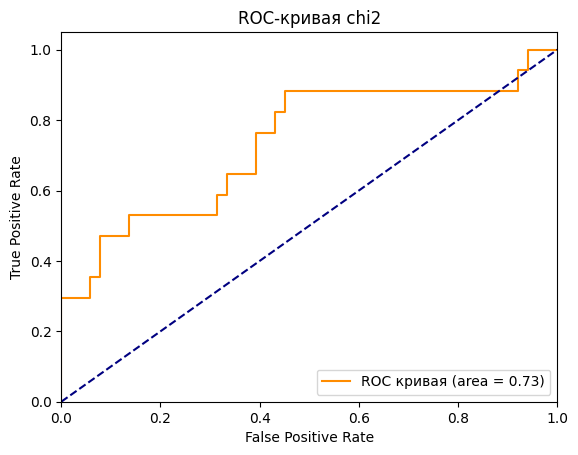

In [47]:
df = df.sort_values(by='chi2', ascending=False)

fpr, tpr, treshold = roc_curve(df['test_y'], df['chi2'])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая chi2')
plt.legend(loc="lower right")
plt.show()

# Roc-кривая точечной взаимной инфорации

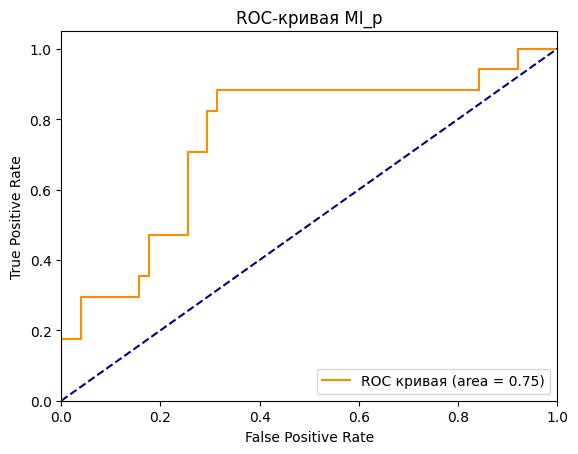

In [48]:
df = df.sort_values(by='MI_p', ascending=False)

fpr, tpr, treshold = roc_curve(df['test_y'], df['MI_p'])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая MI_p')
plt.legend(loc="lower right")
plt.show()

# Roc-кривая средней взаимной инфорамции

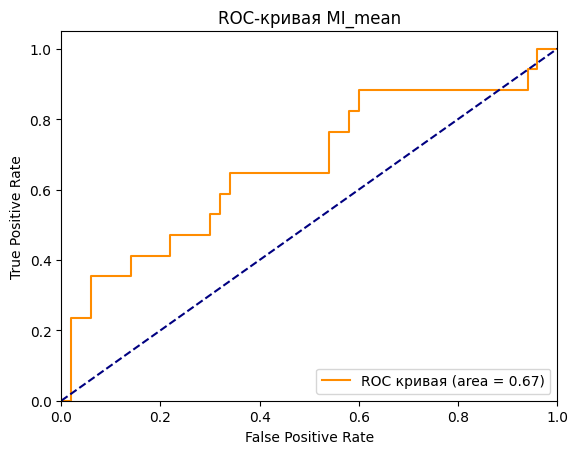

In [49]:
df = df.sort_values(by='MI_mean', ascending=False)

fpr, tpr, treshold = roc_curve(df['test_y'][:len(df)-1], df['MI_mean'][:len(df)-1])
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая MI_mean')
plt.legend(loc="lower right")
plt.show()